In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from string import punctuation
import re
import torch
from torch.utils.data import DataLoader
import random
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertModel, BertTokenizerFast, BertForSequenceClassification
from transformers import TrainingArguments, Trainer

file_path = '/content/drive/My Drive/IMDB_Dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

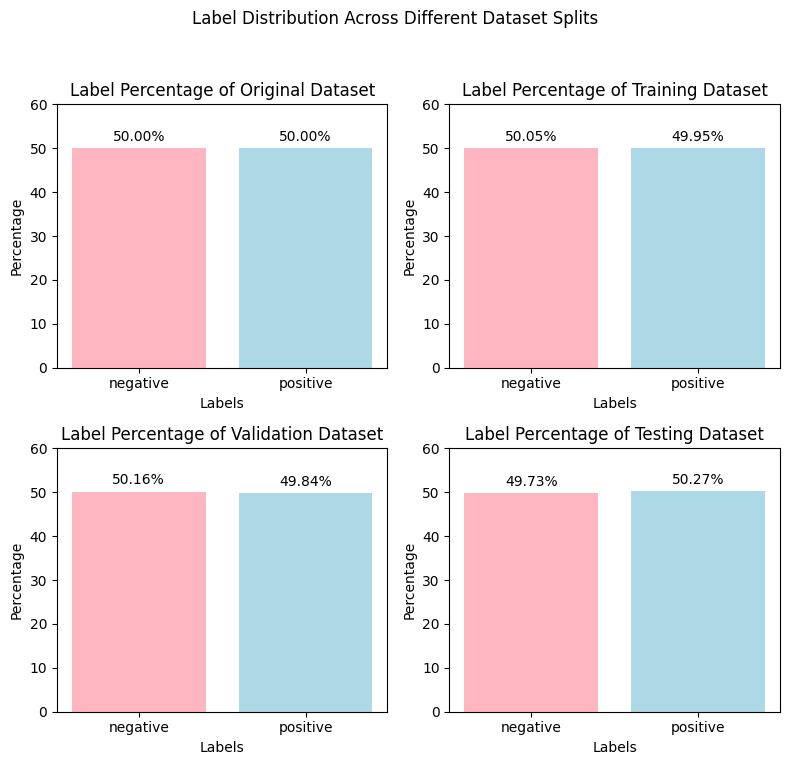

In [ ]:
df = pd.read_csv(file_path)
df = df.sample(frac=1.0, random_state=413)
df.rename(columns={'sentiment': 'labels'}, inplace=True)

train_labels = list(df.labels[:35000])
val_labels = list(df.labels[35000:40000])
test_labels = list(df.labels[40000:])

def plot_bar(ax, data, title):
    bars = ax.bar(data.index, data.values, color=['lightpink', 'lightblue'])
    ax.set_title(title)
    ax.set_ylim(0, 60)
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Labels')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

def calculate_label_percentages(labels):
    label_series = pd.Series(labels)
    return label_series.value_counts(normalize=True) * 100

overall_percentages = calculate_label_percentages(df['labels'])
overall_percentages = overall_percentages.sort_index()
train_percentages = calculate_label_percentages(train_labels)
train_percentages = train_percentages.sort_index()
val_percentages = calculate_label_percentages(val_labels)
val_percentages = val_percentages.sort_index()
test_percentages = calculate_label_percentages(test_labels)
test_percentages = test_percentages.sort_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.suptitle('Label Distribution Across Different Dataset Splits')

plot_bar(axes[0, 0], overall_percentages, 'Label Percentage of Original Dataset')
plot_bar(axes[0, 1], train_percentages, 'Label Percentage of Training Dataset')
plot_bar(axes[1, 0], val_percentages, 'Label Percentage of Validation Dataset')
plot_bar(axes[1, 1], test_percentages, 'Label Percentage of Testing Dataset')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('label_distribution.png')
plt.show()